# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [183]:
df = pd.read_csv('housing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [185]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['ocean_proximity'] = label_encoder.fit_transform(df['ocean_proximity'])

correlation_matrix = df.drop(columns=['ocean_proximity']).corr()

print(correlation_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [189]:
df.corr().tail(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
ocean_proximity,-0.289779,0.200974,0.112468,-0.015693,-0.014768,-0.070282,-0.018186,-0.014957,0.08175,1.0


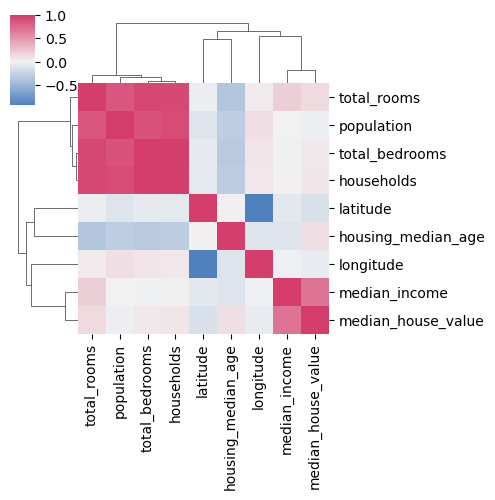

In [191]:
cmap = sns.diverging_palette(h_neg=250, 
                             h_pos=359, 
                             as_cmap=True, 
                             sep=1, 
                             center = 'light')

sns.clustermap(data=correlation_matrix, 
               figsize=(5, 5), 
               center=0, 
               cmap=cmap)

plt.show()

In [193]:
df_numeric = df.select_dtypes(include=['number'])

correlation_matrix = df_numeric.corr()
correlation_matrix


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.289779
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.200974
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.112468
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.015693
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.014768
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.070282
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.018186
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,-0.014957
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.081750
ocean_proximity,-0.289779,0.200974,0.112468,-0.015693,-0.014768,-0.070282,-0.018186,-0.014957,0.081750,1.000000


Analisando a matrix e o mapa de calor, a variável total_bedrooms aparenta ter um potencial preditivo interessante.

### 3. Separe os dados em validação e teste

In [197]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2402)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (15480, 9)
X_test: (5160, 9)
y_train: (15480,)
y_test: (5160,)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [199]:
tree_1 = DecisionTreeRegressor(max_depth=8, random_state=2402)
tree_2 = DecisionTreeRegressor(max_depth=2, random_state=2402)

tree_1.fit(X_train, y_train)
tree_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=2402)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [201]:
mse1_train = mean_squared_error(y_true=y_train, y_pred=tree_1.predict(X_train))
mse1_test = mean_squared_error(y_true=y_test, y_pred=tree_1.predict(X_test))

mse2_train = mean_squared_error(y_true=y_train, y_pred=tree_2.predict(X_train))
mse2_test = mean_squared_error(y_true=y_test, y_pred=tree_2.predict(X_test))

template = 'O erro quadrático médio (MSE) da árvore com profunidade = {0} para a base de {1} é: {2:.2f}'

print(template.format(tree_1.get_depth(), 'treino', mse1_train).replace('.', ','))
print(template.format(tree_1.get_depth(), 'teste', mse1_test).replace('.', ','), '\n')

print(template.format(tree_2.get_depth(), 'treino', mse2_train).replace('.', ','))
print(template.format(tree_2.get_depth(), 'teste', mse2_test).replace('.', ','))

O erro quadrático médio (MSE) da árvore com profunidade = 8 para a base de treino é: 2948047718,42
O erro quadrático médio (MSE) da árvore com profunidade = 8 para a base de teste é: 3898182083,53 

O erro quadrático médio (MSE) da árvore com profunidade = 2 para a base de treino é: 7343449125,19
O erro quadrático médio (MSE) da árvore com profunidade = 2 para a base de teste é: 7446765700,38


In [203]:
r2_1_train = tree_1.score(X=X_train, y=y_train)
r2_2_train = tree_2.score(X=X_train, y=y_train)

r2_1_test = tree_1.score(X=X_test, y=y_test)
r2_2_test = tree_2.score(X=X_test, y=y_test)

template = 'O coeficiente de determinação (R-quadrado) da árvore com profundidade = {0} para a base de {1} é: {2:.2f}'

print(template.format(tree_1.get_depth(), 'treino', r2_1_train).replace(".", ","))
print(template.format(tree_1.get_depth(), 'teste', r2_1_test).replace(".", ","), '\n')

print(template.format(tree_2.get_depth(), 'treino', r2_2_train).replace(".", ","))
print(template.format(tree_2.get_depth(), 'teste', r2_2_test).replace(".", ","))

O coeficiente de determinação (R-quadrado) da árvore com profundidade = 8 para a base de treino é: 0,78
O coeficiente de determinação (R-quadrado) da árvore com profundidade = 8 para a base de teste é: 0,71 

O coeficiente de determinação (R-quadrado) da árvore com profundidade = 2 para a base de treino é: 0,45
O coeficiente de determinação (R-quadrado) da árvore com profundidade = 2 para a base de teste é: 0,45


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

In [205]:
print(f'A árvore que parece mais adequada é `tree_1` com profundidade = {tree_1.get_depth()}')

tree_1

A árvore que parece mais adequada é `tree_1` com profundidade = 8


DecisionTreeRegressor(max_depth=8, random_state=2402)

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

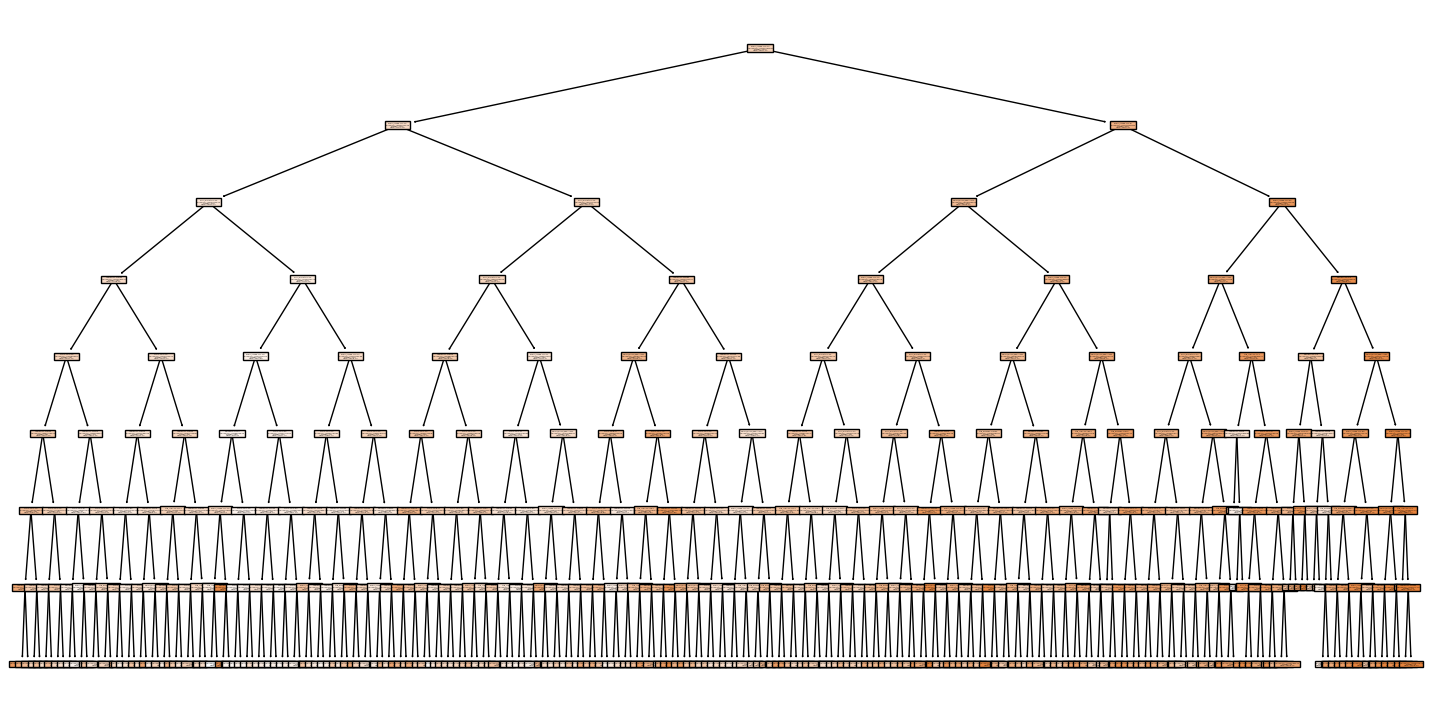

In [207]:
plt.rc('figure', figsize=(18,9))

tp = tree.plot_tree(decision_tree=tree_1, 
                    feature_names=X.columns, 
                    filled=True)

In [208]:
text_tree_print = tree.export_text(decision_tree=tree_1)

print(text_tree_print)

|--- feature_7 <= 5.04
|   |--- feature_7 <= 3.04
|   |   |--- feature_8 <= 0.50
|   |   |   |--- feature_0 <= -118.31
|   |   |   |   |--- feature_1 <= 34.69
|   |   |   |   |   |--- feature_0 <= -118.44
|   |   |   |   |   |   |--- feature_1 <= 34.12
|   |   |   |   |   |   |   |--- feature_0 <= -118.49
|   |   |   |   |   |   |   |   |--- value: [417712.75]
|   |   |   |   |   |   |   |--- feature_0 >  -118.49
|   |   |   |   |   |   |   |   |--- value: [345754.58]
|   |   |   |   |   |   |--- feature_1 >  34.12
|   |   |   |   |   |   |   |--- feature_0 <= -119.42
|   |   |   |   |   |   |   |   |--- value: [287885.05]
|   |   |   |   |   |   |   |--- feature_0 >  -119.42
|   |   |   |   |   |   |   |   |--- value: [202519.15]
|   |   |   |   |   |--- feature_0 >  -118.44
|   |   |   |   |   |   |--- feature_1 <= 34.05
|   |   |   |   |   |   |   |--- feature_0 <= -118.38
|   |   |   |   |   |   |   |   |--- value: [280763.16]
|   |   |   |   |   |   |   |--- feature_0 >  -118.38
|

In [209]:
feature_names = list(df.columns)
print(feature_names)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


Observando a árvore, a variável que representa ser a mais importante é a feature_07, median_income. Pois as quebras iniciam nela, é a mais "alta" da arvore.